## Precision and Recall

In [2]:
import pandas as pd

white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"
red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

* 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

* 로지스틱 회귀

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7429286126611506
Test Acc:  0.7446153846153846


* classification report

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.74      0.74      1300



In [9]:
0.58*(477/1300) + 0.84*(823/1300)

0.7446

* confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [130, 693]])

* precision_recall curve

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

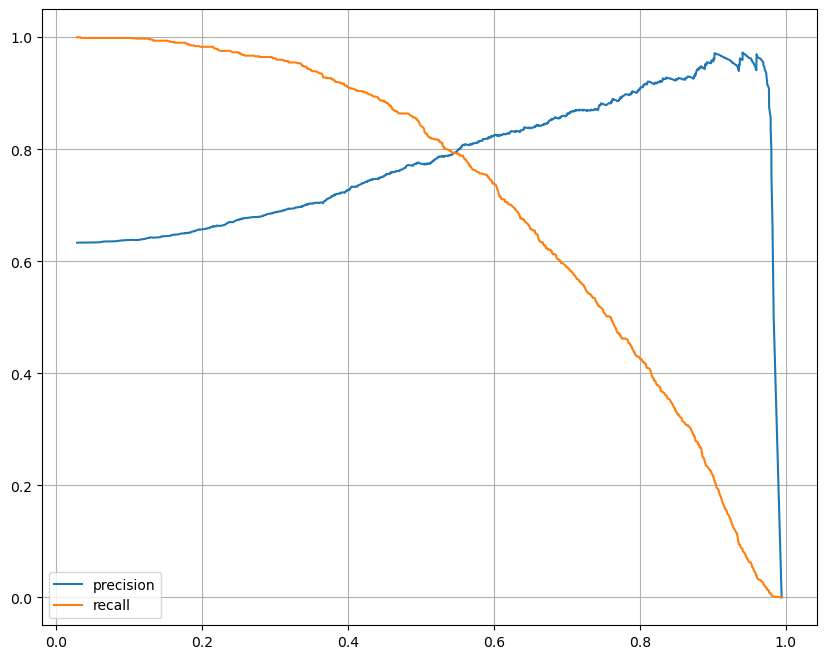

In [12]:
plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid(); plt.legend(); plt.show()

* threshold = 0.5

In [14]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]   # [0일 확률, 1일 확률]

array([[0.40475103, 0.59524897],
       [0.51010833, 0.48989167],
       [0.10224708, 0.89775292]])

In [15]:
pred_proba

array([[0.40475103, 0.59524897],
       [0.51010833, 0.48989167],
       [0.10224708, 0.89775292],
       ...,
       [0.22589487, 0.77410513],
       [0.67292445, 0.32707555],
       [0.31386471, 0.68613529]])

In [16]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [17]:
y_pred_test.reshape(-1, 1)

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [18]:
# pred_proba 옆에 예측값 붙이기
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40475103, 0.59524897, 1.        ],
       [0.51010833, 0.48989167, 0.        ],
       [0.10224708, 0.89775292, 1.        ],
       ...,
       [0.22589487, 0.77410513, 1.        ],
       [0.67292445, 0.32707555, 0.        ],
       [0.31386471, 0.68613529, 1.        ]])

* threshold 바꿔보기 - Binarizer

In [25]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

* classification_report

In [26]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.74      0.74      1300



In [27]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300

